In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import explore

import sklearn.preprocessing
from sklearn.cluster import KMeans

seed = 21

In [2]:
df = acquire.get_wine()

In [3]:
df.color.value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [4]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### There are 2339 rows with outliers out of a total of 6497 rows, for now we will keep outliers

In [5]:
train, X_train, y_train, X_val, y_val, X_test, y_test = explore.split_data(df,'quality')

In [6]:
X_train_s,X_val_s,X_test_s = explore.scale_minmax(X_train,X_val,X_test)

In [7]:
X_train_s.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
540,0.239669,0.153333,0.252033,0.141321,0.051495,0.031250,0.389401,0.157895,0.672727,0.173410,0.492754,0.0
72,0.181818,0.126667,0.227642,0.062980,0.089701,0.104167,0.449309,0.179102,0.881818,0.265896,0.289855,0.0
1389,0.355372,0.073333,0.325203,0.003072,0.046512,0.250000,0.400922,0.105842,0.309091,0.052023,0.289855,0.0
3657,0.157025,0.046667,0.382114,0.164363,0.043189,0.166667,0.281106,0.143628,0.281818,0.052023,0.362319,0.0
860,0.355372,0.126667,0.284553,0.015361,0.034884,0.128472,0.223502,0.104878,0.454545,0.219653,0.347826,0.0


In [9]:
x = X_train[['alcohol','residual sugar']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.predict(x)

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

In [25]:
kmeans.predict(X_val[['alcohol','residual sugar']])

array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

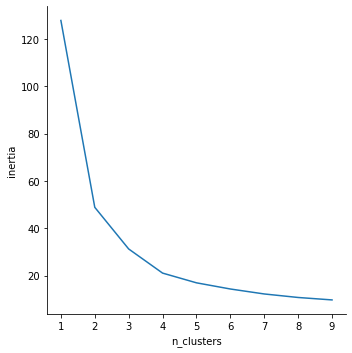

In [10]:
explore.plot_inertia(x)

In [11]:
X_train['cluster'] = kmeans.predict(x)

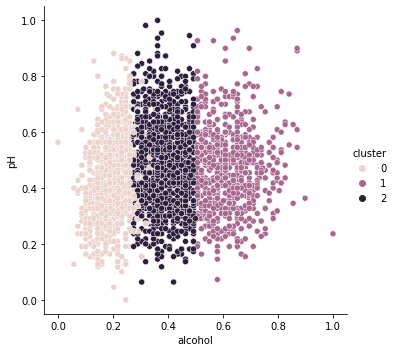

In [12]:
sns.relplot(data=X_train,x='alcohol',y='pH',hue='cluster')

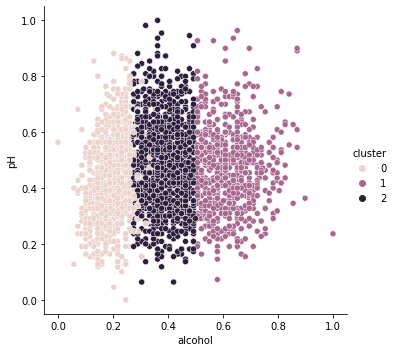

In [16]:
sns.relplot(data=X_train,x='alcohol',y='pH',hue=X_train.cluster)

<AxesSubplot:>

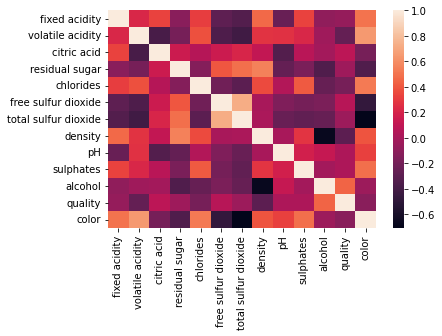

In [19]:
sns.heatmap(train.corr())

In [24]:
train.corr()['quality'].sort_values()

density                -0.295093
volatile acidity       -0.262734
chlorides              -0.190204
color                  -0.114737
fixed acidity          -0.068270
total sulfur dioxide   -0.042280
residual sugar         -0.036281
sulphates               0.024885
pH                      0.025294
free sulfur dioxide     0.062642
citric acid             0.085020
alcohol                 0.441490
quality                 1.000000
Name: quality, dtype: float64

In [32]:
def plot_clusters(df,col1,col2,col3):
    kmeans = KMeans(n_clusters=3)
    
    kmeans.fit(df[[col1,col2]])
    pred1 = kmeans.predict(df[[col1,col2]])
    
    kmeans.fit(df[[col1,col3]])
    pred2 = kmeans.predict(df[[col1,col3]])
    
    kmeans.fit(df[[col2,col3]])
    pred3 = kmeans.predict(df[[col2,col3]])
    
    
    
    return sns.relplot(data=df,x=col1,y=col2,hue=pred1),sns.relplot(data=df,x=col1,y=col3,hue=pred2),sns.relplot(data=df,x=col2,y=col3,hue=pred3)


   
    

In [ ]:
x = X_train[['alcohol','residual sugar']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
kmeans.predict(x)

(<seaborn.axisgrid.FacetGrid at 0x7fd8f030ab80>,
 <seaborn.axisgrid.FacetGrid at 0x7fd92ef20a00>)

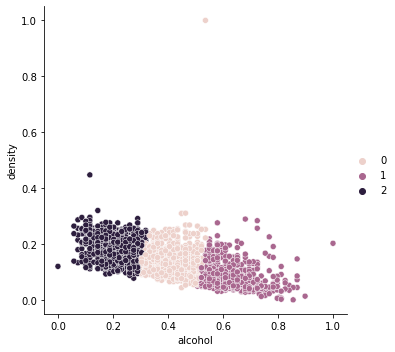

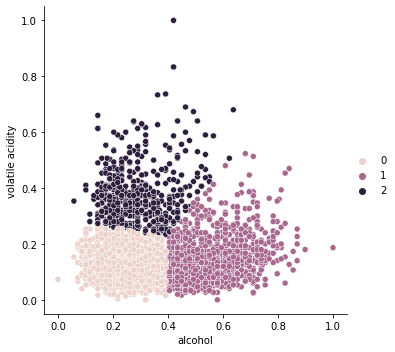

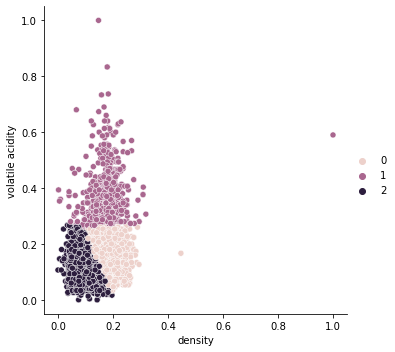

In [33]:
plot_clusters(X_train_s,'alcohol','density','volatile acidity')